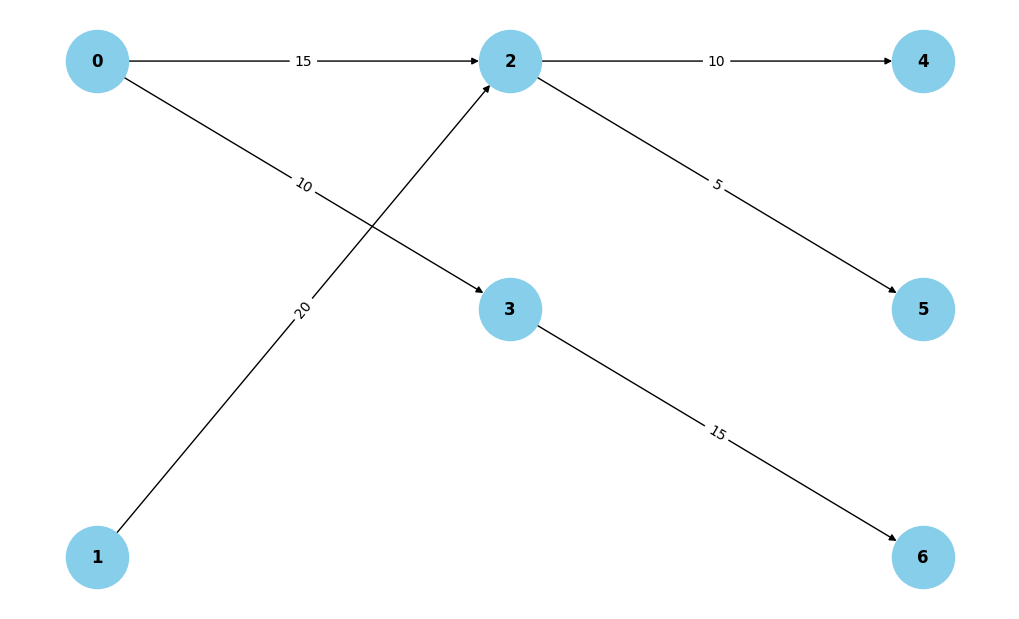

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.DiGraph()

def edge(start: int, end: int, capacity: int): return (start, end, capacity)

# Add edges with capacities
edges = [
    edge(0, 2, 15),  # Source 1 -> Intermediate Node 1
    edge(0, 3, 10),  # Source 1 -> Intermediate Node 2
    edge(1, 2, 20),  # Source 2 -> Intermediate Node 1
    edge(2, 4, 10),  # Intermediate Node 1 -> Consumer 1
    edge(2, 5, 5),   # Intermediate Node 1 -> Consumer 2
    edge(3, 6, 15),  # Intermediate Node 2 -> Consumer 3
]

# Add all edges to the graph
G.add_weighted_edges_from(edges)

# Define positions for drawing the graph
pos = {
    0: (0, 2),  # Source 1
    1: (0, 0),  # Source 2
    2: (2, 2),  # Intermediate Node 1
    3: (2, 1),  # Intermediate Node 2
    4: (4, 2),  # Consumer 1
    5: (4, 1),  # Consumer 2
    6: (4, 0),  # Consumer 3
}

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Display the graph
plt.show()


In [8]:
from collections import deque

# Function to find an augmenting path (BFS)
def bfs(capacity_matrix, flow_matrix, source, sink, parent):
    visited = [False] * len(capacity_matrix)
    queue = deque([source])
    visited[source] = True

    while queue:
        current_node = queue.popleft()
        
        for neighbor in range(len(capacity_matrix)):
            # Check if there is residual capacity in the channel
            if not visited[neighbor] and capacity_matrix[current_node][neighbor] - flow_matrix[current_node][neighbor] > 0:
                parent[neighbor] = current_node
                visited[neighbor] = True
                if neighbor == sink:
                    return True
                queue.append(neighbor)
    
    return False

# Main function to calculate the maximum flow
def edmonds_karp(capacity_matrix, source, sink):
    num_nodes = len(capacity_matrix)
    flow_matrix = [[0] * num_nodes for _ in range(num_nodes)]  # Initialize the flow matrix with zero
    parent = [-1] * num_nodes
    max_flow = 0

    # While there is an augmenting path, add flow
    while bfs(capacity_matrix, flow_matrix, source, sink, parent):
        # Find the minimum capacity along the found path (bottleneck)
        path_flow = float('Inf')
        current_node = sink

        while current_node != source:
            previous_node = parent[current_node]
            path_flow = min(path_flow, capacity_matrix[previous_node][current_node] - flow_matrix[previous_node][current_node])
            current_node = previous_node
        
        # Update the flow along the path, considering the reverse flow
        current_node = sink
        while current_node != source:
            previous_node = parent[current_node]
            flow_matrix[previous_node][current_node] += path_flow
            flow_matrix[current_node][previous_node] -= path_flow
            current_node = previous_node
        
        # Increase the maximum flow
        max_flow += path_flow

    return max_flow

# Capacity matrix for the channels in the network (capacity_matrix)
capacity_matrix = [
    [0, 0, 15, 10, 0, 0, 0],  # Source 1
    [0, 0, 20, 0, 0, 0, 0],   # Source 2
    [0, 0, 0, 0, 10, 5, 0],   # Intermediate Node 1
    [0, 0, 0, 0, 0, 0, 15],   # Intermediate Node 2
    [0, 0, 0, 0, 0, 0, 0],    # Consumer 1
    [0, 0, 0, 0, 0, 0, 0],    # Consumer 2
    [0, 0, 0, 0, 0, 0, 0]     # Consumer 3
]

source = 1  # Source 1
sink = 4    # Consumer 3

print(f"Maximum flow: {edmonds_karp(capacity_matrix, source, sink)}")


Maximum flow: 10
